There are several code libraries added to Python that make it a good tool for data analysis and data visualization. To explore data analysis and data viz, I have used two excel files (csv - comma separated version) on US childhood mortality rates and life expectancy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Starting with data analysis on life expectancy.

In [3]:
df_life = pd.read_csv('us_life_expectancy_at_birth.csv')
df_life.head()

,year,race,sex,life_expectancy
0,2014,All Races,Both Sexes,78.9
1,2013,All Races,Both Sexes,78.8
2,2012,All Races,Both Sexes,78.8
3,2011,All Races,Both Sexes,78.7
4,2010,All Races,Both Sexes,78.7


Creating a plot of changes in life_expectation by year and gender (female, male, and both).
Linear comparison of time versus life expectation.
lmplot() has data as a required parameter and the x and y variables must be specified as strings. 

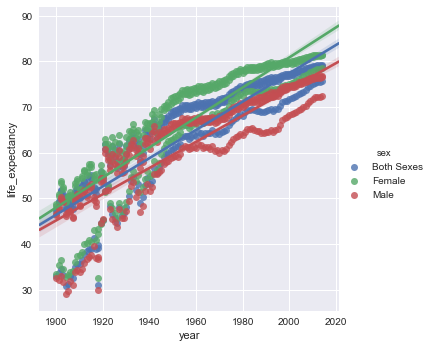

In [6]:
sns.lmplot(x = 'year', y = 'life_expectancy', data = df_life, hue = 'sex')
#You can either save or display the figure
#plt.savefig('life_expectation.png')
plt.show()

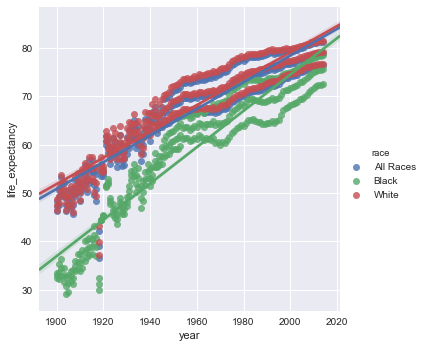

In [7]:
sns.lmplot(x = 'year', y = 'life_expectancy', data = df_life, hue = 'race')
plt.show()

Data for childhood mortality

In [10]:
df_childhood = pd.read_csv('us_childhood_mortality_rates.csv')
df_childhood.head()

,year,age_group,death_rate
0,2015,10-14 years,14.6
1,2015,1-4 years,24.9
2,2015,15-19 years,48.3
3,2015,5-9 years,11.7
4,2014,10-14 years,14.0


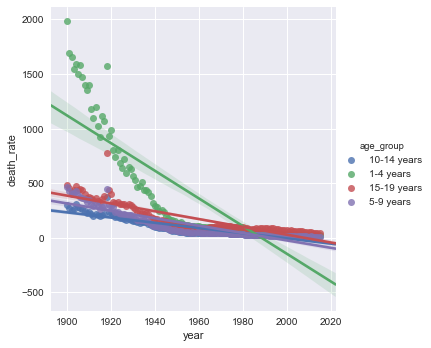

In [11]:
sns.lmplot(x = 'year', y = 'death_rate', data = df_childhood, hue = 'age_group')
plt.show()

Combining the two datasets (life expectation and childhood mortality)

In [15]:
df_life_both_sexes = df_life[df_life.sex == 'Both Sexes']
df_life_both_sexes.head()

,year,race,sex,life_expectancy
0,2014,All Races,Both Sexes,78.9
1,2013,All Races,Both Sexes,78.8
2,2012,All Races,Both Sexes,78.8
3,2011,All Races,Both Sexes,78.7
4,2010,All Races,Both Sexes,78.7


In [16]:
df_life_both_sexes = df_life_both_sexes.drop('sex', axis=1)
df_life_both_sexes.head()

,year,race,life_expectancy
0,2014,All Races,78.9
1,2013,All Races,78.8
2,2012,All Races,78.8
3,2011,All Races,78.7
4,2010,All Races,78.7


In [17]:
df_merged = df_life_both_sexes.merge(df_childhood, left_on='year', right_on='year')
df_merged.head()

,year,race,life_expectancy,age_group,death_rate
0,2014,All Races,78.9,10-14 years,14.0
1,2014,All Races,78.9,1-4 years,24.0
2,2014,All Races,78.9,15-19 years,45.5
3,2014,All Races,78.9,5-9 years,11.5
4,2014,Black,75.6,10-14 years,14.0


Finding the correlation between life expectation and mortality rate

In [19]:
corr = df_merged.life_expectancy.corr(df_merged.death_rate)
print(corr)

-0.635506087812


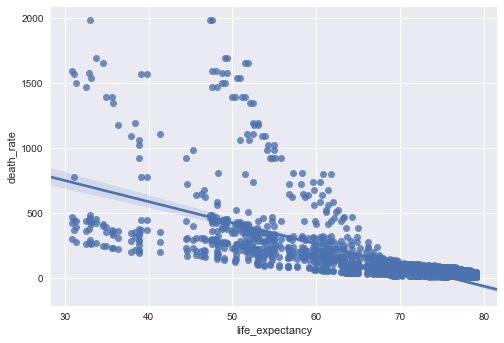

In [20]:
sns.regplot(df_merged.life_expectancy, df_merged.death_rate)
plt.show()

In [22]:
df_infant = df_childhood[df_childhood.age_group == '1-4 years']
df_infant.head()

,year,age_group,death_rate
1,2015,1-4 years,24.9
5,2014,1-4 years,24.0
9,2013,1-4 years,25.5
13,2012,1-4 years,26.3
17,2011,1-4 years,26.3


In [23]:
df_merged = df_life_both_sexes.merge(df_infant, left_on='year', right_on='year')
corr = df_merged.life_expectancy.corr(df_merged.death_rate)
print(corr)

-0.870597223868


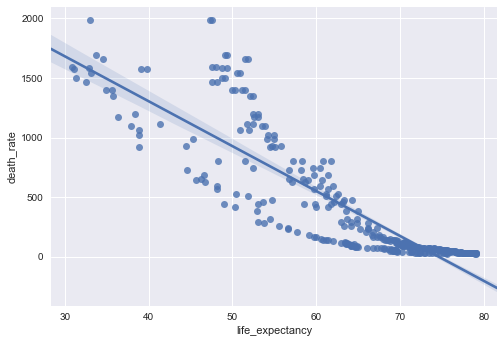

In [24]:
sns.regplot(df_merged.life_expectancy, df_merged.death_rate)
plt.show()